In [1]:
from numpy import loadtxt
from stkdef60 import One_trian_stk_class
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost
import csv as csv
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score,KFold, train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import skew
from collections import OrderedDict
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
from stkdef60 import One_trian_stk_class
import logging
import pickle
import matplotlib.pyplot as plt
from kiteconnect import KiteConnect
logging.basicConfig(level=logging.ERROR)
import threading
import pandas as pd
import numpy as np
from  sklearn.multioutput import MultiOutputRegressor
import joblib
import livelossplot
import seaborn as sns
from tqdm import tqdm
# from pactools.grid_search import GridSearchCVProgressBar
homediraddr='/home/hemang'
kite = KiteConnect(api_key="w19o0chuo929jxkp")
kite.login_url()
plt.style.use("seaborn")
with open('kitefile.p', 'rb') as fp:
    kite = pickle.load(fp)

Using TensorFlow backend.


In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 50
test_size = 0.09
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
parameters_for_testing = {
   'estimator__colsample_bytree':[0.4,0.8],
   'estimator__gamma':[0.03,0.3],
   'estimator__min_child_weight':[1.5,10],
   'estimator__learning_rate':[0.1,0.07],
   'estimator__max_depth':[3,15],
   'estimator__n_estimators':[10000],
   'estimator__reg_alpha':[1e-5,  0.75],
   'estimator__reg_lambda':[1e-5, 0.45],
   'estimator__subsample':[0.6,0.95],
}

xgbmodel = xgboost.XGBRegressor(colsample_bytree=0.4,
                                 gamma=0.5,                 
                                 learning_rate=0.05,
                                 max_depth=20,
                                 min_child_weight=1.1,
                                 n_estimators=10000,                                                                    
                                 reg_alpha=0.50,
                                 reg_lambda=0.40,
                                 subsample=0.6,
                                 seed=50,
                                 objective='reg:squarederror')

xx={'name':'TATASTEEL',
    'insttkn':895745,
    'nbatch':1,
    'nepochs':5,
    'trainlen':'all',
    'kite':kite}
trainit= One_trian_stk_class(xx['name'], xx['insttkn'],xx['nbatch'],xx['nepochs'],xx['trainlen'],xx['kite'])
trainit.load()
trainit.ta_xtrain_def()

reshapedxt=trainit.ta_x_train.reshape([trainit.ta_x_train.shape[0],60*4])
xtreshaped=trainit.ta_x_test.reshape([trainit.ta_x_test.shape[0],60*4])

multioutputregressor = MultiOutputRegressor(xgbmodel)

eval_set = [(reshapedxt, trainit.ta_y_train), (xtreshaped, trainit.ta_y_test)]

gsearch1 = GridSearchCV(estimator = multioutputregressor, 
                        param_grid = parameters_for_testing, 
                        n_jobs=8,
                        iid=False, 
                        verbose=1,
                        scoring='neg_mean_squared_error')

gsearch1.fit(reshapedxt,trainit.ta_y_train,
            eval_metric=["error", "logloss"], 
              eval_set=eval_set, 
              verbose=False)
print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

In [ ]:
joblib.dump(gsearch1, "gsearch1.p") 

In [ ]:
# print (gsearch1.grid_scores_)
print('best params')
# print (gsearch1.best_params_)
print('best score')
# print (gsearch1.best_score_)

In [15]:
# parameters_for_testing = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]
# }

multioutputregressor = MultiOutputRegressor(xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                  n_jobs= -1,
                 seed=25),
                                           n_jobs= -1, 
                                           )
xx={'name':'TATASTEEL',
    'insttkn':895745,
    'nbatch':1,
    'nepochs':5,
    'trainlen':'all',
    'kite':kite}
trainit= One_trian_stk_class(xx['name'], xx['insttkn'],xx['nbatch'],xx['nepochs'],
                             xx['trainlen'],xx['kite'])
trainit.load()
trainit.ta_xtrain_def()
reshapedxt=trainit.ta_x_train.reshape([trainit.ta_x_train.shape[0],60*trainit.ta_x_train.shape[2]])
xtreshaped=trainit.ta_x_test.reshape([trainit.ta_x_test.shape[0],60*trainit.ta_x_train.shape[2]])

eval_set = [(reshapedxt, trainit.ta_y_train), (xtreshaped, trainit.ta_y_test)]

print(multioutputregressor.get_params())


# gsearch1 = RandomizedSearchCV(estimator = xgbmodel, 
#                         param_distributions = parameters_for_testing, 
#                         n_jobs=-1,
#                         verbose=1,
#                         scoring='roc_auc')

df loaded began................
Loaded : TATASTEEL_DF.p 1
Checking Model Path : /home/hemangjoshi37a_gmail_com/stkwise_models60/TATASTEEL/TATASTEEL_105.h5


100%|██████████| 61/61 [00:00<00:00, 334.89it/s]

model loaded : /home/hemangjoshi37a_gmail_com/TATASTEEL_118.h5
df loaded end................


TATASTEEL : ta_x_train shape :  (95950, 60, 66)
TATASTEEL : ta_y_train shape :  (95950, 60)
TATASTEEL : ta_x_test shape :  (909, 60, 66)
TATASTEEL : ta_y_test shape :  (909, 60)
ta_xtrain_def end............
{'estimator__objective': 'reg:squarederror', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__colsample_bylevel': None, 'estimator__colsample_bynode': None, 'estimator__colsample_bytree': 0.4, 'estimator__gamma': 0, 'estimator__gpu_id': None, 'estimator__importance_type': 'gain', 'estimator__interaction_constraints': None, 'estimator__learning_rate': 0.07, 'estimator__max_delta_step': None, 'estimator__max_depth': 5, 'estimator__min_child_weight': 1.5, 'estimator__missing': nan, 'estimator__monotone_constraints': None, 'estimator__n_estimators': 1000, 'estimator__n_jobs': -1, 'estimator__num_parallel_tree': None, 'estimator__random_state': None, 'estimator__reg_alpha': 0.75, 'estimator__reg_lambda': 0.45, 'estimator__scale_pos_weight': None, 'estimator__subsam

In [11]:
trainit.ta_x_train.shape

(95950, 60, 66)

In [12]:
trainit.ta_x_test.shape

(909, 60, 66)

In [13]:
trainit.ta_y_train.shape

(95950, 60)

In [14]:
trainit.ta_y_test.shape

(909, 60)

In [16]:
multioutputregressor.fit(reshapedxt, trainit.ta_y_train,
                          eval_metric=["error", "logloss"], 
                          eval_set=eval_set, 
                          verbose=True,
                        )

joblib.dump(multioutputregressor, "multioutputregressor4.p") 

['multioutputregressor4.p']

In [17]:
print('sdfsf')

sdfsf


In [ ]:
joblib.dump(multioutputregressor, "multioutputregressor2.p") 

In [ ]:
from matplotlib.pyplot import figure
corrMatrix = trainit.talibdf.corr()
figure(num=None, figsize=(8, 8), dpi=150)
sns.heatmap(corrMatrix)
plt.show()

In [ ]:
multioutputregressor=joblib.load('multioutputregressor.p')

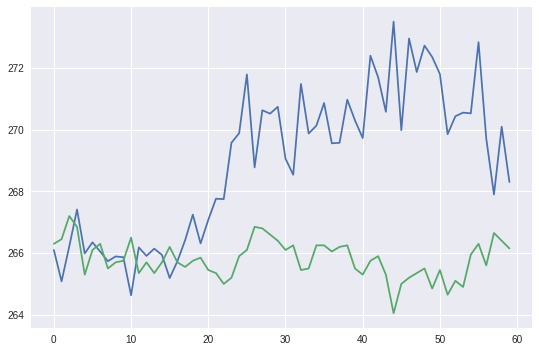

In [18]:
pred0=multioutputregressor.predict(trainit.ta_x_test[0].reshape(1,60*trainit.ta_x_test.shape[2]))
act0=trainit.ta_y_test[0]
diff=np.array(pred0[0])-np.array(act0)
difflist=diff.tolist()
table0=pd.DataFrame({'true':act0,'pred':pred0[0],'diff':difflist})
table0['pred'].plot()
table0['true'].plot()

# table0['diff'].plot()

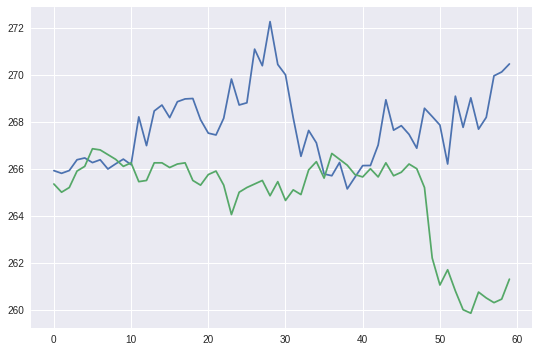

In [19]:
pred1=multioutputregressor.predict(trainit.ta_x_test[21].reshape(1,60*trainit.ta_x_test.shape[2]))
act1=trainit.ta_y_test[21]
diff=np.array(pred1[0])-np.array(act1)
difflist1=diff.tolist()
table1=pd.DataFrame({'true':act1,'pred':pred1[0],'diff':difflist1})
table1['pred'].plot()
table1['true'].plot()

# table1['diff'].plot()

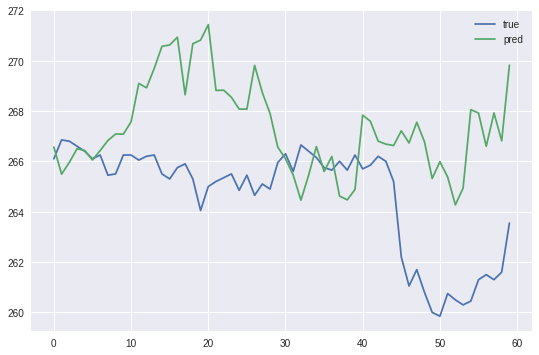

In [20]:
pred1=multioutputregressor.predict(trainit.ta_x_test[25].reshape(1,60*trainit.ta_x_test.shape[2]))
act1=trainit.ta_y_test[25]
diff=np.array(pred1[0])-np.array(act1)
difflist1=diff.tolist()
table1=pd.DataFrame({'true':act1,'pred':pred1[0],
#                      'diff':difflist1
                    })
# table1['pred'].plot()
# table1['true'].plot()
table1.plot()
# table1['diff'].plot()

In [ ]:
# newdict={'table1_pred':table0['diff'].values.tolist(),'table2_pred':table1['diff'].values.tolist()} 
# hjdf=pd.DataFrame(newdict)
# hjdf.plot()